In [61]:
import sqlite3
import pandas as pd
import numpy as np
import os
import polars as pl

import random
random.seed(42)

import sys

sys.path.append('../')
sys.path.append('../networks')
from dotenv import load_dotenv

import plotly.express as px

# Load the environment variables from the .env file
dotenv_path = os.path.join('../', '.env')
load_dotenv(dotenv_path)

True

In [62]:
import matplotlib.pyplot as plt


data = pd.read_csv('../networks/data/global_before_1700.csv', index_col=[0])
data = data[['wikidata_id', 'meta_occupation', 'region_name']].drop_duplicates()

df_non_specialist = data[data['meta_occupation'].str.contains(' | ')]
df_non_specialist = df_non_specialist.groupby('region_name')['wikidata_id'].count().rename('count_non_specialists').reset_index()

df_specialist = data[~data['meta_occupation'].str.contains(' | ')]
df_specialist = df_specialist.groupby('region_name')['wikidata_id'].count().rename('count_specialists').reset_index()


df_final = pd.merge(df_non_specialist, df_specialist, on='region_name') # Korea is dropped
df_final['total'] = df_final['count_non_specialists'] + df_final['count_specialists']
df_final = df_final.sort_values('total', ascending=True)
df_final

,region_name,count_non_specialists,count_specialists,total
14,Ottoman Turkey,2,24,26
18,South East Asia,4,24,28
10,Japan,7,60,67
1,Balkans,15,78,93
16,Portugal,19,94,113
8,Indian world,23,104,127
17,Slav world,36,152,188
15,Persian world,54,145,199
11,Latin World,39,176,215
4,Chinese world,71,321,392


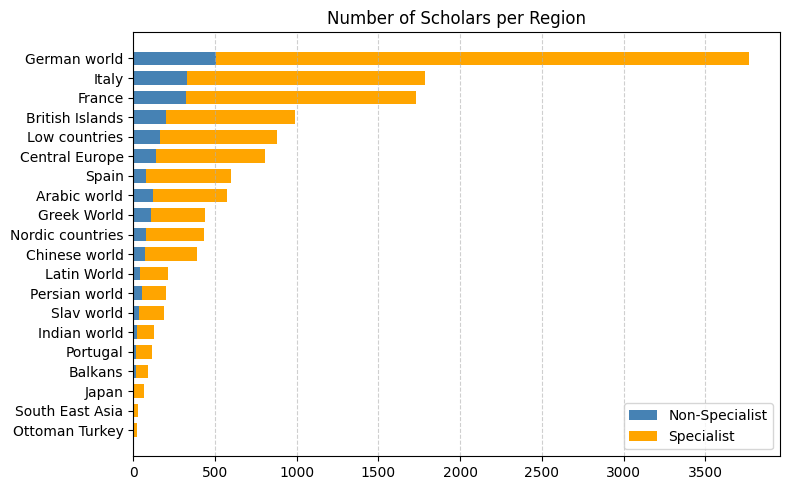

In [63]:
categories = list(df_final['region_name'])
values = list(df_final['count_non_specialists'])
values_specialist = list(df_final['count_specialists'])

# Choose colors for the bars
bar_color = '#4682B4'  # Steel Blue
bar_color_specialist = '#FFA500'  # Orange (you can choose another color)

# Set the width of the bars
bar_width = 0.7

# Calculate the positions for the bars
x = np.arange(len(categories))

# Create the figure and axis
plt.figure(figsize=(8, 5))  # Adjust the figure size as needed
plt.barh(x, values, bar_width, color=bar_color, label='Non-Specialist')
plt.barh(x, values_specialist, bar_width, left=values, color=bar_color_specialist, label='Specialist')

# Add labels and title
plt.xlabel('')
plt.ylabel('')
plt.title('Number of Scholars per Region')

# Set the y-axis ticks and labels to be the region names
plt.yticks(x, categories)

# Add a legend
plt.legend(loc='lower right')

# Show the plot
plt.grid(axis='x', linestyle='--', alpha=0.6)  # Add horizontal grid lines

# Show the plot
plt.tight_layout()
plt.show()

,wikidata_id,meta_occupation,region_name
0,Q316119,historian,Latin World
1,Q782074,theologian | philosopher,Latin World
2,Q182123,theologian | philosopher,Latin World
3,Q44344,theologian | philosopher,Latin World
4,Q1430,philosopher,Latin World
...,...,...,...
2912,Q57252424,theologian,Arabic world
2913,Q11362,botanist | astronomer | philosopher | mathemat...,Arabic world
2914,Q1243803,historian,Arabic world
2915,Q18397639,historian,Arabic world
